scikit-learnのサンプルデータのアヤメのデータセットを用いてランダムフォレスト分類モデルを構築し、特徴量の重要度、予測精度、交差検証による性能評価、および最初の決定木のみ可視化を実施

             feature  importance
3   petal width (cm)    0.525038
2  petal length (cm)    0.373437
0  sepal length (cm)    0.077356
1   sepal width (cm)    0.024169
正解率は96.67%
交差検証の結果: [1.         0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]
交差検証の平均スコア: 0.96
交差検証のスコアの標準偏差: 0.04


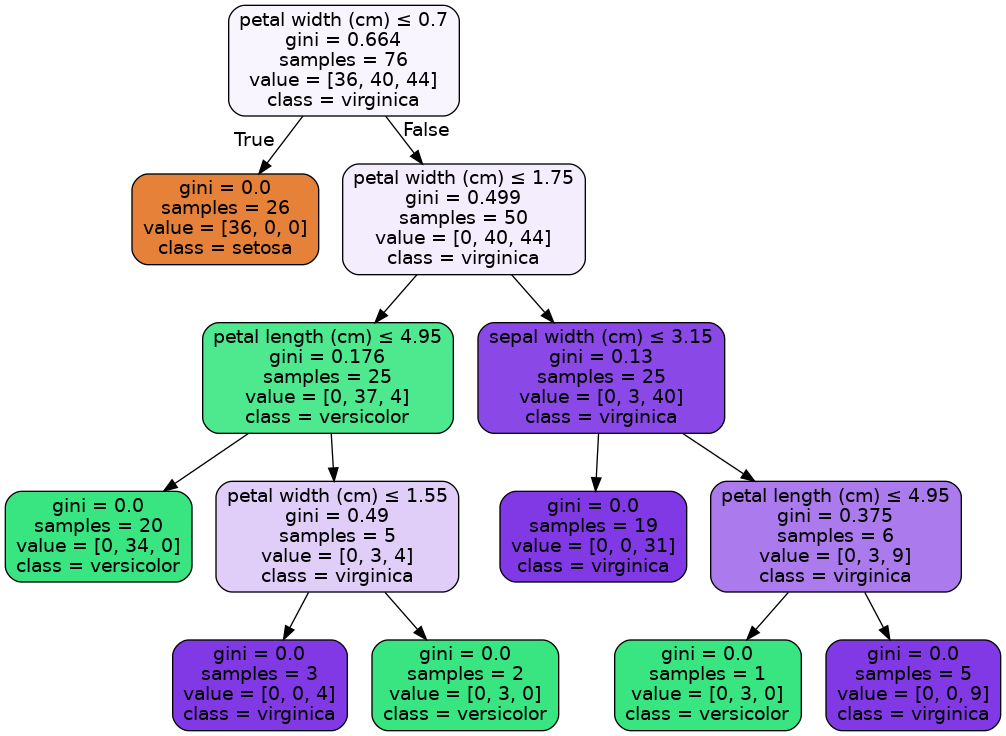

In [4]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

X = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y = df['species']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2)

# ランダムフォレストのクラス作成
clf = RandomForestClassifier()
# 学習の実行
clf.fit(X_train, y_train)

# 特徴量の重要度をDataFrameで表示
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': clf.feature_importances_
})
print(feature_importance_df.sort_values('importance', ascending=False))

# 予測結果の格納
pred = clf.predict(X_test)
# 予測結果の評価
accuracy = accuracy_score(y_test, pred)
print('正解率は'+ str(round(accuracy*100,2))+'%')

# 交差検証の実行
scores = cross_val_score(clf, X, y, cv=10)  # cvは分割数（ここでは5分割）
print('交差検証の結果:', scores)
print('交差検証の平均スコア:', scores.mean())

# スコアの標準偏差を計算して表示
std_dev = np.round(np.std(scores),2)
print('交差検証のスコアの標準偏差:', std_dev)

 # ランダムフォレスト内の最初の決定木を抽出
estimator = clf.estimators_[0]

dot_data = export_graphviz(estimator,  # 決定木をGraphviz形式に変換
                           out_file=None,  # ファイルには出力せず、文字列として保持
                           feature_names=X.columns,  # 特徴量の名前を設定
                           class_names=iris.target_names,  # クラスの名前を設定
                           filled=True,  # ノードを色で塗りつぶす
                           rounded=True,  # ノードの角を丸くする
                           special_characters=True)  # 特殊文字を許可

# Graphviz形式の文字列をSourceオブジェクトに変換
graph = graphviz.Source(dot_data)

# SourceオブジェクトをPNG形式の画像データに変換し表示
png_data = graph.pipe(format='png')
Image(png_data)